# Chemical Research Scientist

The given file 'isotopes.xlsx' contains the details of a particular chemical's **critical point**, **pressure** and **isotope** corresponding to its **temperature** in degrees as per the existing research work of scientists.

### Prediction Level 1 - High Temperature Analysis

With the given data, use the **most suitable machine learning algorithm** and **predict the most appropriate value of pressure for temperature of 80, 90 and 100 degrees each.**

| Temperature | Pressure | 
|-------------|----------| 
| 80          |  ?       | 
| 90          |  ?       | 
| 100         |  ?       |

**Also predict the value of critical point at these temperatures.**

| Temperature | Critical point | 
|-------------|----------------| 
| 80          |  ?             | 
| 90          |  ?             | 
| 100         |  ?             |

**Important research details (for reference during prediction):**
1. The chemical check is possible at temperature between 0 to 100 degrees only.
2. The critical point is always positive.
3. The critical point of the chemical should not be greater than 15.
4. One scientist experimented at 100 degrees and the critical point was reported as 9.2. So, it gives a basis to the research that the predicted critical point will be around 8 to 12.

**Steps to be followed:**
1. Initially plot the required graphs for data visualisation and understanding purpose. Analyse and mention which machine learning methods will you use to predict the pressure and critical point with respect to temperature. And which columns are required for which predictions.
2. Proceed with prediction of pressure first. Split your data into training and testing data set. It should be a 75:25 split with any random state of your choice.
3. Use appropriate machine learning model to fit the training dataset.
4. Test your model with testing dataset. Calculate R2 coefficient and Mean Square Error (MSE) to justify that your model is accurate.
5. Predict the most appropriate value of pressure for temperature of 80, 90 and 100 degrees each.
6. Plot the approriate graph representing the model and prediction.
7. **Repeat step 2 to step 6** to predict the most appropriate value of critical point for temperature of 80, 90 and 100 degrees each. (Keep in consideration, the **Important research details** mentioned above.)

### Prediction Level 2 - Isotope Analysis

The chemical has 3 isotopes named, A,B and C (as mentioned in dataset).

**The type of isotope is dependent on critical point and pressure only.**

Perform classification of the following chemical based on isotopes and predict the isotope for following chemicals

| Pressure | Critical point | Isotope | 
|----------|----------------|---------| 
| 7.2      |  3             |  ?      | 
| 8        |  2             |  ?      | 
| 6.4      |  4             |  ?      | 

**Steps to be followed:**
1. Initially plot the required graph for data visualisation and understanding purpose. Analyse and mention which classification algorithm will you use to predict the isotope based on pressure and critical point.
2. Use appropriate machine learning model to fit the entire dataset. *(Train test split not required.)*
3. Test your model with all inputs. Print confusion matrix and the heatmap of the same. Also print the classification report.
4. Predict the isotope for above mentioned 3 different inputs.
5. Plot the contour plot to validate your classification. **(BONUS: 2 marks)**

**Important instructions**

All the graphs should contain proper title, labels, legend, grid, colour map, etc. whichever is applicable for better interpretation.

In [1]:
import pandas as pd

df = pd.read_excel('isotopes.xlsx')
df.head()

,temp,critical_point,pressure,isotope
0,0,2.00,8.50,A
1,2,2.01,8.42,A
2,3,2.03,8.35,A
3,5,2.08,8.27,A
4,6,2.10,8.20,A


## Initially plot the required graphs for data visualisation and understanding purpose. Analyse and mention which machine learning methods will you use to predict the pressure and critical point with respect to temperature. And which columns are required for which predictions.

for predict pressure use linear regression
for predict critical point use polynomial regression
use supervised learning


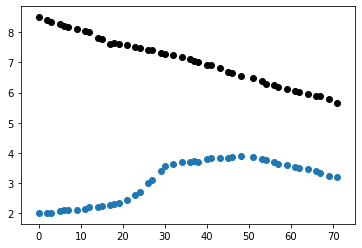

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df['temp'],df['critical_point'])
plt.scatter(df['temp'],df['pressure'],color='k')
print('for predict pressure use linear regression')
print('for predict critical point use polynomial regression')
print('use supervised learning')
print('for pred any value use temp as input')

## Proceed with prediction of pressure first. Split your data into training and testing data set. It should be a 75:25 split with any random state of your choice.

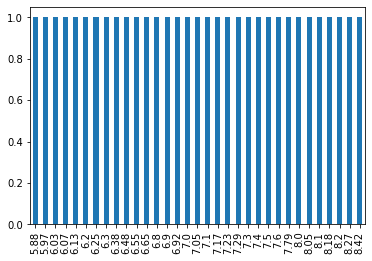

In [14]:
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=train_test_split(df['temp'],df['pressure'],test_size=0.25,random_state=2)
x1=ip_train.values.reshape(-1,1)
y1=ip_test.values.reshape(-1,1)
x2=op_train.values.reshape(-1,1)
y2=op_test.values.reshape(-1,1)
op_train.value_counts().sort_index().plot(kind='bar')

## Use appropriate machine learning model to fit the training dataset.

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,x2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Test your model with testing dataset. Calculate R2 coefficient and Mean Square Error (MSE) to justify that your model is accurate

In [20]:
print("R^2 Score is ",model.score(ip_test.values.reshape(-1,1),op_test.values.reshape(-1,1)))#R^2 coefficient
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(op_test.values.reshape(-1,1),model.predict(ip_test.values.reshape(-1,1)), multioutput='uniform_average')
print("MSE is ",mse)

R^2 Score is  0.9969275038996397
MSE is  0.0026584495130246694


## Predict the most appropriate value of pressure for temperature of 80, 90 and 100 degrees each.

In [25]:
print(model.predict([[80]]))
print(model.predict([[90]]))
print(model.predict([[100]]))

[[5.34072291]]
[[4.95301075]]
[[4.5652986]]


## Plot the approriate graph representing the model and prediction.

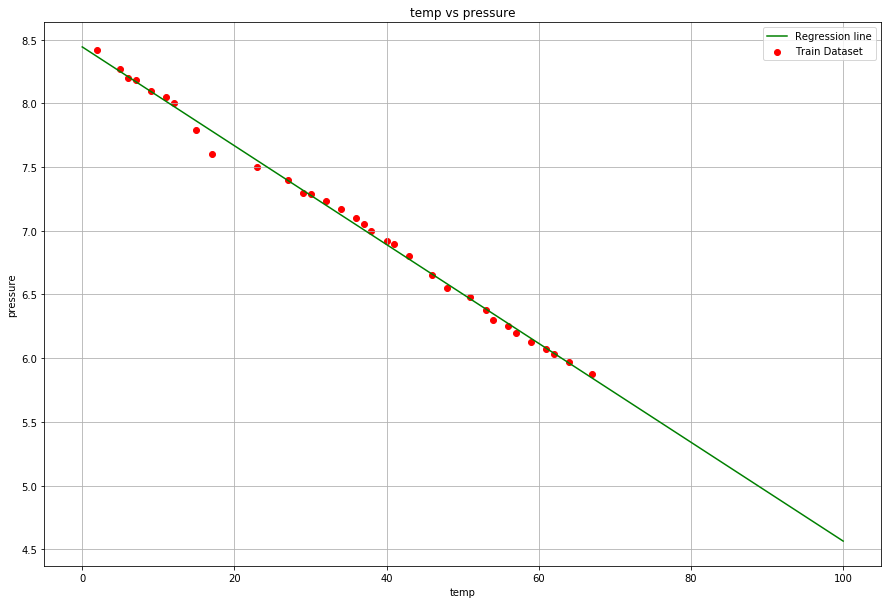

In [26]:
plt.figure(figsize=[15,10])
plt.scatter(x1,x2,color='r',label="Train Dataset")
plt.title("temp vs pressure")
plt.xlabel("temp")
plt.ylabel("pressure")
plt.grid(True)
plt.plot([0,100],model.predict([[0],[100]]),color='g',label="Regression line")
plt.legend()

## Critical pt

In [86]:
ip_train,ip_test,op_train,op_test=train_test_split(df['temp'],df['critical_point'],test_size=0.25,random_state=True)
x1=ip_train.values.reshape(-1,1)
y1=ip_test.values.reshape(-1,1)
x2=op_train.values.reshape(-1,1)
y2=op_test.values.reshape(-1,1)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
quadraticcoeff= poly.fit_transform(x1)

In [88]:
model.fit(quadraticcoeff,x2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
quadraticcoeff= poly.fit_transform(y1)

In [81]:
print('score is ',model.score(quadraticcoeff,y2))
mse=mean_squared_error(y2,model.predict(quadraticcoeff),multioutput='uniform_average')
#multioutput defines weighs used to average errors
print('MSE is ',mse)

score is  0.859847070742577
MSE is  0.05404265320428723


In [82]:
quadraticcoeff= poly.fit_transform([[80]])

In [83]:
print(model.predict(quadraticcoeff))

[[3.09043378]]


In [84]:
quadraticcoeff= poly.fit_transform([[90]])
print(model.predict(quadraticcoeff))

[[2.58972718]]


In [85]:
quadraticcoeff= poly.fit_transform([[100]])
print(model.predict(quadraticcoeff))

[[1.93207181]]


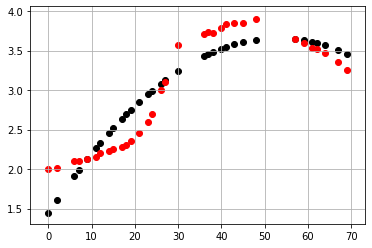

In [91]:
plt.grid()
plt.scatter(x1,model.predict(quadraticcoeff),color='k')
plt.scatter(x1,x2,color='r')

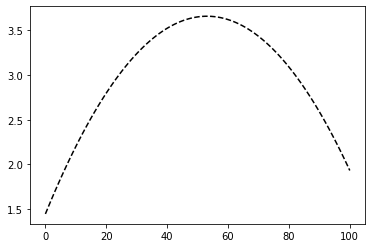

In [94]:
o=np.linspace(0,100,100).reshape(-1,1)
o_quad=poly.fit_transform(o)
plt.plot(o,model.predict(o_quad),'k--')

## Prediction Level 2 - Isotope Analysis
## The chemical has 3 isotopes named, A,B and C (as mentioned in dataset).

## The type of isotope is dependent on critical point and pressure only.

## Perform classification of the following chemical based on isotopes and predict the isotope for following chemicals
## Pressure 	Critical point 	Isotope
- Steps to be followed:

    - Initially plot the required graph for data visualisation and understanding purpose. Analyse and mention which classification algorithm will you use to predict the isotope based on pressure and critical point.
    - Use appropriate machine learning model to fit the entire dataset. (Train test split not required.)
    - Test your model with all inputs. Print confusion matrix and the heatmap of the same. Also print the classification report.
    - Predict the isotope for above mentioned 3 different inputs.
    - Plot the contour plot to validate your classification. (BONUS: 2 marks)

- Important instructions

- All the graphs should contain proper title, labels, legend, grid, colour map, etc. whichever is applicable for better interpretation.

In [97]:
newdata=df[['pressure','critical_point','isotope']]

In [98]:
newdata.head()

,pressure,critical_point,isotope
0,8.50,2.00,A
1,8.42,2.01,A
2,8.35,2.03,A
3,8.27,2.08,A
4,8.20,2.10,A


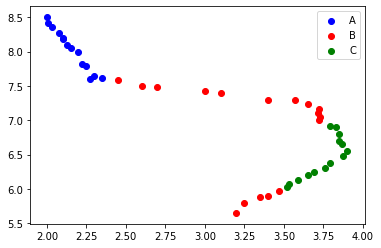

In [102]:
A=df[df['isotope']=='A']
B=df[df['isotope']=='B']
C=df[df['isotope']=='C']
plt.scatter(A['critical_point'].values,A['pressure'].values,color='blue',label='A')
plt.scatter(B['critical_point'].values,B['pressure'].values,color='red',label='B')
plt.scatter(C['critical_point'].values,C['pressure'].values,color='green',label='C')
plt.legend()

In [245]:
print('svc tree model is needed')

svc tree model is needed


In [247]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm, metrics

In [248]:
SVCClassifier=SVC(kernel='linear',C=10,max_iter=150)
SVCModel=SVCClassifier.fit(df[['pressure','critical_point']],df['isotope'])

### Test your model with all inputs. Print confusion matrix and the heatmap of the same. Also print the classification report.

In [249]:
print(A['isotope'][:3])
print(SVCModel.predict(A[['pressure','critical_point']][:3]))

0    A
1    A
2    A
Name: isotope, dtype: object
['A' 'A' 'A']


In [250]:
print(B['isotope'][:3])
print(SVCModel.predict(B[['pressure','critical_point']][:3]))

14    B
15    B
16    B
Name: isotope, dtype: object
['A' 'B' 'B']


In [251]:
print(C['isotope'][:3])
print(SVCModel.predict(C[['pressure','critical_point']][:3]))

26    C
27    C
28    C
Name: isotope, dtype: object
['C' 'C' 'C']


In [254]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual=df['isotope']
pred=SVCModel.predict(df[['pressure','critical_point']])
#print(actual)
#print(pred)
print(confusion_matrix(actual,pred))
print(classification_report(actual,pred))

[[14  0  0]
 [ 1 15  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           A       0.93      1.00      0.97        14
           B       1.00      0.88      0.94        17
           C       0.93      1.00      0.97        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.95        45



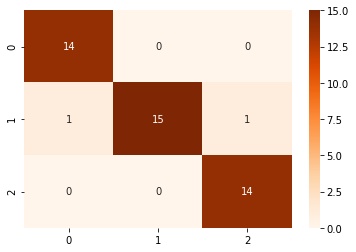

In [255]:
import seaborn
seaborn.heatmap(confusion_matrix(actual,pred),annot=True,cmap="Oranges",)

## Predict the isotope for above mentioned 3 different inputs.

- 7.2 	3 	
- 8 	2 	
- 6.4 	4 

In [256]:
SVCModel.predict([[7.2,3]])

array(['B'], dtype=object)

In [257]:
SVCModel.predict([[8,2]])

array(['A'], dtype=object)

In [258]:
SVCModel.predict([[6.4,4]])

array(['C'], dtype=object)

- Plot the contour plot to validate your classification. (BONUS: 2 marks)